### Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


## =======================================================================

## 1. Import Necessary Libraries

In [114]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import the Data

In [115]:
startups_data= pd.read_csv('50_Startups.csv')
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## 3. Data Understanding

#### 3.1 Perform the initial Analysis

In [116]:
startups_data.shape

(50, 5)

In [117]:
startups_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [118]:
startups_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [119]:
startups_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

#### 3.2 Perform the Assumption Checks

##### 1. Linearity Test

<Figure size 360x144 with 0 Axes>

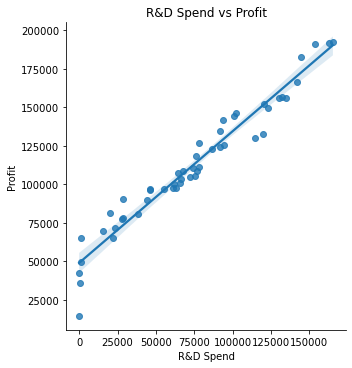

In [351]:
plt.figure(figsize=(5,2))
sns.lmplot(x='R&D Spend',y='Profit',data=startups_data)
plt.title('R&D Spend vs Profit')
plt.show()

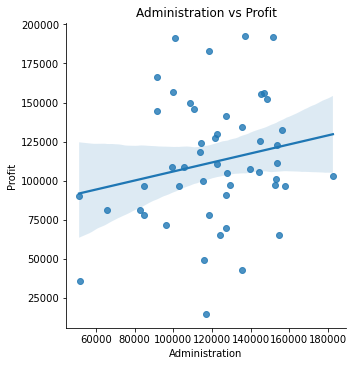

In [121]:
sns.lmplot(x='Administration',y='Profit',data=startups_data)
plt.title('Administration vs Profit')
plt.show()

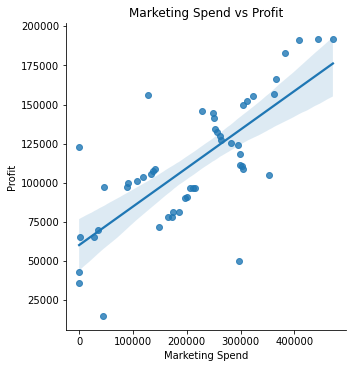

In [122]:
sns.lmplot(x='Marketing Spend',y='Profit',data=startups_data)
plt.title('Marketing Spend vs Profit')
plt.show()

##### 2. Normality Test

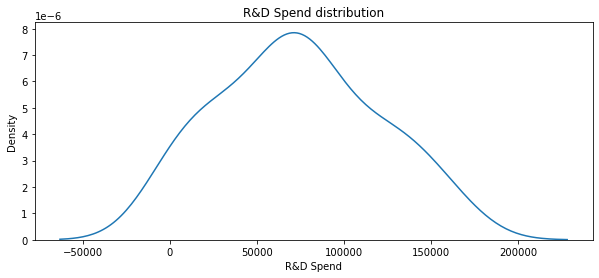

In [123]:
plt.figure(figsize=(10,4))
sns.kdeplot(x='R&D Spend', data=startups_data)
plt.title('R&D Spend distribution')
plt.show()

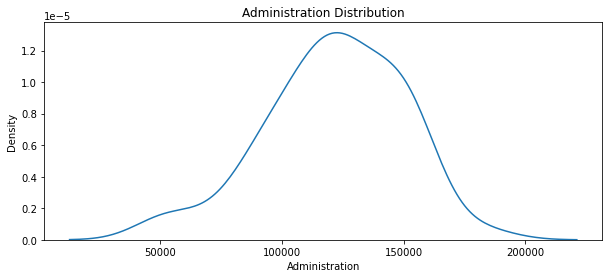

In [124]:
plt.figure(figsize=(10,4))
sns.kdeplot(x='Administration',data=startups_data)
plt.title('Administration Distribution')
plt.show()

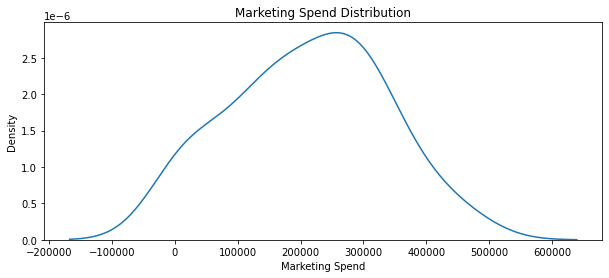

In [125]:
plt.figure(figsize=(10,4))
sns.kdeplot(x='Marketing Spend',data=startups_data)
plt.title('Marketing Spend Distribution')
plt.show()

##### 3. No Multicollinearity

In [126]:
corr_matrix= startups_data.corr().round(2)
corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.00,0.24,0.72,0.97
Administration,0.24,1.00,-0.03,0.20
Marketing Spend,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


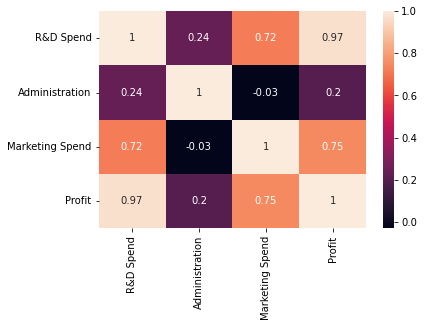

In [127]:
sns.heatmap(data=corr_matrix, annot= True)
plt.show()

In [128]:
# VIF Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
x= startups_data[['R&D Spend','Administration','Marketing Spend']]

In [130]:
vif_data= pd.DataFrame()
vif_data['feature']= x.columns

In [131]:
# calculating VIF for each feature

vif_data["VIF"] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]

In [132]:
print(vif_data)

           feature       VIF
0        R&D Spend  8.384571
1   Administration  4.026406
2  Marketing Spend  7.593984


##### 4. No Autoregression

No inputs are showing timedate format so test is passed

##### 5. Homoscedasticity Test || 6. Zero Residual Mean Test

shall be performed after model building

## 4. Model Building

### Model-1

In [133]:
x= startups_data.drop(labels=['Profit',"State"], axis=1)
y= startups_data[['Profit']]

In [134]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [135]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## 5. Model Training

In [136]:
from sklearn.linear_model import LinearRegression

In [242]:
linear_reg_model= LinearRegression()

In [243]:
linear_reg_model.fit(x,y)

LinearRegression()

In [244]:
linear_reg_model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [245]:
linear_reg_model.intercept_

array([50122.19298987])

## 6. Model Testing

In [141]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [142]:
y_predict= linear_reg_model.predict(x)
y_predict

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327],
       [163580.7805712 ],
       [158114.09666865],
       [160021.36304781],
       [151741.69969865],
       [154884.68410995],
       [135509.01636714],
       [135573.71296074],
       [129138.05418243],
       [127487.99166275],
       [149548.64633453],
       [146235.1599852 ],
       [116915.40540144],
       [130192.44720781],
       [129014.2268059 ],
       [115635.21636716],
       [116639.6692309 ],
       [117319.45164029],
       [114706.98171695],
       [109996.61522126],
       [113362.96611314],
       [102237.72506481],
       [110600.5753503 ],
       [114408.07145684],
       [101660.02600497],
       [101794.98345176],
       [ 99452.37293606],
       [ 97687.85627575],
       [ 99001.32898549],
       [ 97915.00780465],
       [ 89039.27374116],
       [ 90511.59956753],
       [ 75286.17458546],
       [ 89619.5377079 ],
       [ 696

## 7. Model Evaluation 

In [143]:
error= y-y_predict
error

,Profit
0,-259.422890
1,2635.291768
2,8903.110904
3,9205.289974
4,-5951.574183
5,-6589.660571
6,-1991.586669
7,-4268.763048
8,470.070301
9,-5124.724110


### 5.  Homoscedasticity Test

In [353]:
# x i.e. inputs and y i.e. error are in same size/units, therefore standardization is required on input data (x) 

In [355]:
from sklearn.preprocessing import StandardScaler
standard_x= StandardScaler()
standard_x= standard_x.fit_transform(x)
standard_x= pd.DataFrame(standard_x, columns=['R&D Spend', 'Administration', 'Marketing Spend'])
standard_x.headad()

,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528


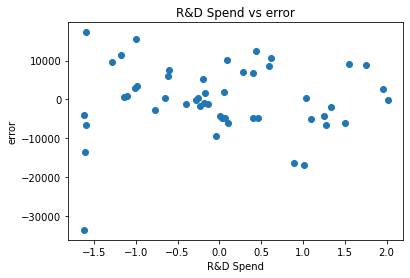

In [356]:
plt.scatter(x= standard_x['R&D Spend'], y=error)
plt.xlabel('R&D Spend')
plt.ylabel('error')
plt.title('R&D Spend vs error')
plt.show()

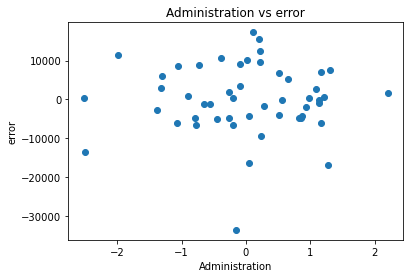

In [357]:
plt.scatter(x= standard_x['Administration'], y=error)
plt.xlabel('Administration')
plt.ylabel('error')
plt.title('Administration vs error')
plt.show()

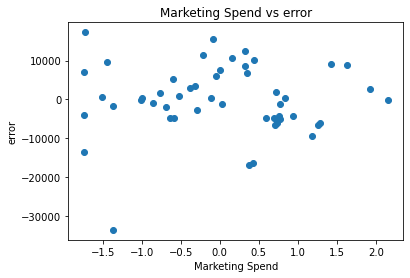

In [358]:
plt.scatter(x= standard_x['Marketing Spend'], y=error)
plt.xlabel('Marketing Spend')
plt.ylabel('error')
plt.title('Marketing Spend vs error')
plt.show()

#### 6. Zero Residual plo

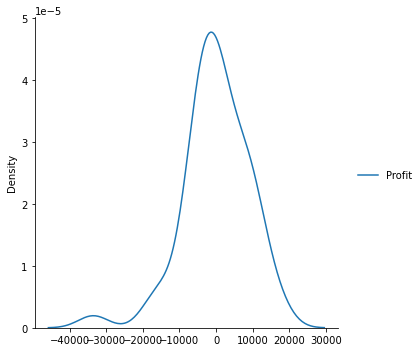

In [359]:
# Another technique
sns.displot(error, kind="kde")# Should be normally distributed.

Zero residual mean test is passed.

In [ ]:
# We will check the r2 Score and Adj. R2 Score

In [360]:
from sklearn.metrics import r2_score

In [361]:
r2_score(y, y_predict)
r2= r2_score(y, y_predict)
r2

0.9507459940683246

In [362]:
x.shape

(50, 3)

In [423]:
#Adjusted R2 Score

1-((1-r2)*(50-1)/(50-3-1))

0.9475337762901719

# Even though by check R2 and Adj R2 score that should as close to 1, the model prediction is good. However, we will build few models.

In [206]:
# By Applying the Square root transformation on X &Y 

## Model -2 

In [254]:
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## 4. Model Building

In [364]:
x_rev1= np.sqrt(startups_data.drop(labels=['Profit','State'], axis=1)) # sqrt for x
y_rev1= startups_data[['Profit']]

In [365]:
x_rev1.head()

,R&D Spend,Administration,Marketing Spend
0,406.631529,369.997027,686.865416
1,403.234051,389.072731,666.257105
2,391.716109,318.033882,638.697534
3,379.963696,344.487808,619.031195
4,376.971272,302.310718,605.118517


## 5. Model Training

In [366]:
linear_reg_model_2= LinearRegression()

In [367]:
linear_reg_model_2.fit(x_rev1,y_rev1)

LinearRegression()

In [368]:
linear_reg_model_2.coef_

array([[349.35805336, -22.68634093,  13.71126971]])

In [369]:
linear_reg_model_2.intercept_

array([26498.06641618])

## 6. Model Testing

In [370]:
y_rev1.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [371]:
y_predict_rev1= linear_reg_model_2.predict(x_rev1)
y_predict_rev1

array([[169581.98394053],
       [167679.72381441],
       [164889.57278726],
       [159913.97927814],
       [159634.63540687],
       [154458.94141431],
       [150873.57232848],
       [151753.88647172],
       [146697.67436979],
       [149282.52193752],
       [137045.71974224],
       [137324.1999863 ],
       [132290.05913238],
       [131000.5416343 ],
       [145458.88791292],
       [143796.7419682 ],
       [123215.33621879],
       [132630.5619523 ],
       [132099.46988783],
       [120310.94179084],
       [122808.05964531],
       [122922.22308921],
       [121132.26398025],
       [117477.78632898],
       [121461.27483734],
       [111955.14927732],
       [118790.40748183],
       [120346.98049607],
       [111302.25823119],
       [111594.35667546],
       [109908.06608471],
       [108086.83968581],
       [109258.69803933],
       [107866.23509817],
       [ 99059.54384327],
       [101038.31964097],
       [ 83708.27718956],
       [100786.9163954 ],
       [ 762

## 7. Model Evaluation 

In [372]:
error_2= y_rev1-y_predict_rev1
error_2

,Profit
0,22679.846059
1,24112.336186
2,26160.817213
3,22988.010722
4,6553.304593
5,2532.178586
6,5248.937672
7,3998.713528
8,5514.095630
9,477.438062


In [ ]:
# Checking R2 square and adj. R2 Score for Model2

In [338]:
r2_2M= r2_score(y_rev1,y_predict_rev1)
r2_2M

0.9079571755611123

In [339]:
x_rev1.shape

(50, 3)

In [422]:
#Adjusted R2 Score

1-((1-r2_2M)*(50-1)/(50-3-1))

0.9019543826629239

## Model-3

In [254]:
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## 4. Model Building

In [283]:
x_rev2= (startups_data.drop(labels=['Profit','State'], axis=1))
y_rev2= np.sqrt(startups_data[['Profit']]) # sqrt for Y

In [285]:
x_rev2.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [284]:
y_rev2.head()

,Profit
0,438.476715
1,437.940704
2,437.093114
3,427.670422
4,407.661551


## 5. Model Training

In [286]:
linear_reg_model_3= LinearRegression()

In [287]:
linear_reg_model_3.fit(x_rev2,y_rev2)

LinearRegression()

In [288]:
linear_reg_model_3.coef_

array([[1.25115417e-03, 1.58609823e-06, 4.33796190e-05]])

In [289]:
linear_reg_model_3.intercept_

array([226.87865294])

## 6. Model Testing

In [290]:
y_rev2.head()

,Profit
0,438.476715
1,437.940704
2,437.093114
3,427.670422
4,407.661551


In [291]:
y_predict_rev2= linear_reg_model_3.predict(x_rev2)
y_predict_rev2

array([[454.43894193],
       [449.8096922 ],
       [436.71410977],
       [424.32207451],
       [420.70604688],
       [407.77608982],
       [401.07712597],
       [404.18217362],
       [391.44947819],
       [394.59196471],
       [364.50395581],
       [363.81420787],
       [355.35655754],
       [353.15073221],
       [388.32187019],
       [381.71558066],
       [336.14517787],
       [357.79742662],
       [354.64558969],
       [335.24650946],
       [335.42054351],
       [338.20235444],
       [332.80987469],
       [324.76074238],
       [329.528139  ],
       [313.99028544],
       [327.17033757],
       [332.62016223],
       [314.93420534],
       [313.85156882],
       [308.57996203],
       [307.43876319],
       [308.41702815],
       [305.78437549],
       [294.35926468],
       [293.49945647],
       [271.66776425],
       [290.64535593],
       [260.33031817],
       [282.84431423],
       [270.53858884],
       [269.04603245],
       [263.02989906],
       [248

## 7. Model Evaluation 

In [292]:
error_3= y_rev2-y_predict_rev2
error_3

,Profit
0,-15.962226
1,-11.868988
2,0.379004
3,3.348348
4,-13.044496
5,-11.555040
6,-5.953715
7,-9.527134
8,-1.306210
9,-7.603644


In [373]:
# Checking R2 square and adj. R2 Score for Model3

In [374]:
r2_3M= r2_score(y_rev2,y_predict_rev2)
r2_3M

0.8953971925069149

In [375]:
x_rev2.shape

(50, 3)

In [421]:
#Adjusted R2 Score

1-((1-r2_3M)*(50-1)/(50-3-1))

0.888575270279105

## Model-4

In [293]:
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## 4. Model Building

In [305]:
x_rev3= np.sqrt(startups_data.drop(labels=['Profit','State'], axis=1))
y_rev3= np.sqrt(startups_data[['Profit']])

In [306]:
x_rev3.head()

,R&D Spend,Administration,Marketing Spend
0,406.631529,369.997027,686.865416
1,403.234051,389.072731,666.257105
2,391.716109,318.033882,638.697534
3,379.963696,344.487808,619.031195
4,376.971272,302.310718,605.118517


In [307]:
y_rev3.head()

,Profit
0,438.476715
1,437.940704
2,437.093114
3,427.670422
4,407.661551


## 5. Model Training

In [308]:
linear_reg_model_4= LinearRegression()

In [309]:
linear_reg_model_4.fit(x_rev3,y_rev3)

LinearRegression()

In [310]:
linear_reg_model_4.coef_

array([[ 0.57751624, -0.03060472,  0.01486894]])

In [311]:
linear_reg_model_4.intercept_

array([188.03839816])

## 6. Model Testing

In [312]:
y_rev3.head()

,Profit
0,438.476715
1,437.940704
2,437.093114
3,427.670422
4,407.661551


In [313]:
y_predict_rev3= linear_reg_model_4.predict(x_rev3)
y_predict_rev3

array([[421.76401323],
       [418.91168445],
       [414.02422855],
       [406.13498627],
       [405.49076455],
       [397.05026278],
       [393.50081132],
       [393.29019145],
       [385.0453661 ],
       [388.97878721],
       [369.34375103],
       [369.43599841],
       [361.48486447],
       [359.40899805],
       [383.47017267],
       [380.36841056],
       [346.31614119],
       [361.96631666],
       [360.70227456],
       [345.82096302],
       [345.31289634],
       [345.87124992],
       [342.59900083],
       [336.37372817],
       [344.27007449],
       [328.98635351],
       [340.36889795],
       [341.0108343 ],
       [328.49420134],
       [328.85544924],
       [325.91354498],
       [323.29061639],
       [325.65389826],
       [321.14847117],
       [307.14753065],
       [309.73617656],
       [281.57332471],
       [308.94482731],
       [268.71953342],
       [298.84526779],
       [281.61187478],
       [281.61294494],
       [273.06335645],
       [251

## 7. Model Evaluation 

In [314]:
error_4= y_rev3-y_predict_rev3
error_4

,Profit
0,16.712702
1,19.029019
2,23.068885
3,21.535436
4,2.170786
5,-0.829213
6,1.622600
7,1.364848
8,5.097902
9,-1.990467


In [377]:
# Checking R2 square and adj. R2 Score for Model2

In [378]:
r2_4M= r2_score(y_rev3,y_predict_rev3)
r2_4M

0.9305435277653865

In [379]:
x_rev1.shape

(50, 3)

In [420]:
#Adjusted R2 Score

1-((1-r2_4M)*(50-1)/(50-3-1))

0.9260137578370422

In [424]:
print('Model_1:', "R2_Score: 0.950" , "Adj_R2_Score: 0.940")
print('Model_2:', "R2_Score: 0.907" , "Adj_R2_Score: 0.900")
print('Model_3:', "R2_Score: 0.895" , "Adj_R2_Score: 0.888")
print('Model_4:', "R2_Score: 0.930" , "Adj_R2_Score: 0.926")

Model_1: R2_Score: 0.950 Adj_R2_Score: 0.940
Model_2: R2_Score: 0.907 Adj_R2_Score: 0.900
Model_3: R2_Score: 0.895 Adj_R2_Score: 0.888
Model_4: R2_Score: 0.930 Adj_R2_Score: 0.926


#### Even after applying the optimizing technique the Performance of Model 1 is better compared to other models, therefore for prediction we will use model-1  

## 8. New Data Prediction

In [397]:
X_test= pd.DataFrame(data={'R&D Spend':[200,300,400], 'Administration':[200,300,400], 'Marketing Spend':[200,300,400]})
X_test

,R&D Spend,Administration,Marketing Spend
0,200,200,200
1,300,300,300
2,400,400,400


In [398]:
linear_reg_model.predict(X_test)

array([[50283.41841913],
       [50364.03113376],
       [50444.64384839]])

## 9. Model Deployement

In [402]:
from pickle import dump

In [407]:
dump(linear_reg_model,open('startups_intelligence.pkl','wb'))

In [408]:
from pickle import load

In [409]:
loaded_linear_model = load(open('startups_intelligence.pkl','rb'))

In [412]:
y_pred = loaded_linear_model.predict(X_test)
y_pred

array([[50283.41841913],
       [50364.03113376],
       [50444.64384839]])

# THE END!!!

## =======================================================================